# Unit 1: Vectors, Matrices, Inverses, and Determinants

In this unit:
1. Vectors
1. Operations with vectors
1. Dot product
1. Norms
1. Matrices
1. Operations with matrices
1. Special matrices
1. Transpose
1. Inverses 
1. Determinants
1. Gradient vectors


### Dimension (length) of a vector

In [5]:
v1 = 1.0

1.0

In [6]:
typeof(v1)

Float64

In [4]:
v1 = [1.0]

1-element Array{Float64,1}:
 1.0

In [12]:
v1 = [1] #scalar
v2 = [1,2] #in the plane
v3 = [1,2,3] # in space
v4 = [1,2,3,4] #higher diemension
println("Length of v3 = ", length(v3))
length.([v1,v2,v3,v4])

Length of v3 = 3


4-element Array{Int64,1}:
 1
 2
 3
 4

In [34]:
typeof([v1,v2,v3,v4])

Array{Array{Float64,1},1}

In [35]:
length([v1,v2,v3,v4])

4

In [36]:
length.([v1,v2,v3,v4])

4-element Array{Int64,1}:
 6
 6
 3
 4

In [10]:
? length

search: length



```
length(collection) -> Integer
```

Return the number of elements in the collection.

Use [`lastindex`](@ref) to get the last valid index of an indexable collection.

# Examples

```jldoctest
julia> length(1:5)
5

julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(A::AbstractArray)
```

Return the number of elements in the array, defaults to `prod(size(A))`.

# Examples

```jldoctest
julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(s::AbstractString) -> Int
length(s::AbstractString, i::Integer, j::Integer) -> Int
```

The number of characters in string `s` from indices `i` through `j`. This is computed as the number of code unit indices from `i` to `j` which are valid character indices. With only a single string argument, this computes the number of characters in the entire string. With `i` and `j` arguments it computes the number of indices between `i` and `j` inclusive that are valid indices in the string `s`. In addition to in-bounds values, `i` may take the out-of-bounds value `ncodeunits(s) + 1` and `j` may take the out-of-bounds value `0`.

See also: [`isvalid`](@ref), [`ncodeunits`](@ref), [`lastindex`](@ref), [`thisind`](@ref), [`nextind`](@ref), [`prevind`](@ref)

# Examples

```jldoctest
julia> length("jμΛIα")
5
```


### Linear combintations of vectors

A LaTeX formula:
$$\alpha_1 v_1 + \alpha_2 v_2$$

In [16]:
v1 = [1,2,3]
v2 = [4,5,6]
α1 = 2
α2 = -1
α1*v1 + α2*v2

3-element Array{Int64,1}:
 -2
 -1
  0

### Dot products

$$
u \cdot v = u^{T} v = \sum_{i=1}^n u_i v_i
$$

In [25]:
v1 = 0.15*ones(6)
v1[6] = 0.25
v2 = [90,80,30,60,90,100]

6-element Array{Int64,1}:
  90
  80
  30
  60
  90
 100

In [27]:
v1⋅v2

77.5

In [28]:
#comprehension
[v1[k]*v2[k] for k in 1:n]

6-element Array{Float64,1}:
 13.5
 12.0
  4.5
  9.0
 13.5
 25.0

In [26]:
using LinearAlgebra
n = length(v1)
n == length(v2) || @error "Vectors must be of same length"
v1'*v2, dot(v1,v2), v1 ⋅ v2, sum([v1[k]*v2[k] for k in 1:n]) #get ⋅ using \cdot +[TAB]

(77.5, 77.5, 77.5, 77.5)

In [30]:
typeof(v1'*v2)

Float64

In [33]:
sum(v1.*v2)

77.5

### Norms

The $L_2$ norm:
$$
||u|| = \sqrt{u^Tu} = \sqrt{\sum_{i=1}^n u_i^2}
$$

The $L_1$ norm
$$
||u||_1 = \sum_{i=1}^n |u_i|
$$

In [37]:
using LinearAlgebra

In [39]:
v1

6-element Array{Float64,1}:
 0.15
 0.15
 0.15
 0.15
 0.15
 0.25

In [40]:
norm(v1,1)

1.0

In [38]:
norm(v1),norm(v1,2),sqrt(v1'*v1) 

(0.4183300132670378, 0.4183300132670378, 0.4183300132670378)

In [41]:
norm(-v1)

0.4183300132670378

In [42]:
norm(v1,1),norm(-v1,1) #The L_1 norm

(1.0, 1.0)

$||u + v||^2 = ||u||^2 + 2u^Tv + ||v||^2$

$||u|| \ge 0$

$||\gamma u || = |\gamma|~||u||$

$||u|| = 0$ only if $u = 0$.

### Normalizing a vector

In [45]:
v1

6-element Array{Float64,1}:
 0.15
 0.15
 0.15
 0.15
 0.15
 0.25

In [44]:
normVect(v) = v/norm(v)
vn = normVect(v1)
println("Norm of normed vec: ", norm(vn))
vn

Norm of normed vec: 0.9999999999999999


6-element Array{Float64,1}:
 0.35856858280031806
 0.35856858280031806
 0.35856858280031806
 0.35856858280031806
 0.35856858280031806
 0.5976143046671968

### Angle between two vectors

$$
\angle(u,v) = \arccos \Big( \frac{u^T v}{||u|| ||v||} \Big)
$$

In [49]:
u = [10,0]
v = [-10, 0]
θ = acos((u ⋅ v)/norm(u)/norm(v))
rad2deg(θ)

180.0

In [54]:
# Don't confuse with angle of a complex number

In [59]:
x = 2 + 3im

2 + 3im

In [55]:
? angle

search: angle StepRangeLen UpperTriangular LowerTriangular UnitUpperTriangular



```
angle(z)
```

Compute the phase angle in radians of a complex number `z`.

# Examples

```jldoctest
julia> rad2deg(angle(1 + im))
45.0

julia> rad2deg(angle(1 - im))
-45.0

julia> rad2deg(angle(-1 - im))
-135.0
```


Sometimes we speak about $\cos \theta$:

$$
\cos \theta = \frac{u^T v}{||u|| ||v||}
$$

In [20]:
u = [10,0]
v = [5, 5]
θ = (u ⋅ v)/norm(u)/norm(v)
θ, rad2deg(θ),sqrt(2)/2

(0.7071067811865475, 40.51423422706977, 0.7071067811865476)

### Cauchy-Schwarz, Inequality

$$
|u^T v| \le ||u|| ~ ||v||
$$

$$
(u^T v)^2 \le ||u||^2 ~ ||v||^2
$$

Proof (essense):  Assume $u \neq 0$ and $v \neq 0$. Set $\alpha := ||u||$, $\beta := ||v||$:

$$
0 \le || \alpha u - \beta v||^2 = \ldots \ldots = 2 ||u||^2 ||v||^2 - 2 ||u||~||v|| (u^T v)
$$

Hence,

$$
u^T v \le ||u||~||v||
$$

Now repeat with $-u$ and $v$.

### Triangle Inequality

$$||u + v|| \le ||u|| + ||v||$$

Proof:

$$ ||u+v||^2 = ||u||^2 + 2u^T v + ||v||^2 \le ||u||^2 + 2 ||u|| ~ ||v|| + ||v||^2 = \big( ||u|| + ||v|| \big)^2$$

$$(a+b)^2 = a^2+2ab+b^2$$

CS check:

$$
0 \le ||u|| ~ ||v|| - |u^T v|
$$

In [62]:
? push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` in `collection`. If `collection` is an ordered container, the items are inserted at the end (in the given order).

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

If `collection` is ordered, use [`append!`](@ref) to add all the elements of another collection to it. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`. For `AbstractSet` objects, [`union!`](@ref) can be used instead.


$$||u + v|| \le ||u|| + ||v||$$

$$0 \le ||u|| + ||v|| - ||u + v||$$

In [77]:
u = [5,5]
v = [10,10]
norm(u) + norm(v)

21.213203435596427

In [78]:
norm(u+v)

21.213203435596427

In [79]:
n = 2 #length of vectors
N = 10^5 #run on so many vectors
arr1 = [] #init an empty array
for _ in 1:N
    u = rand(n)
    v = rand(n)
    #cs = norm(u)*norm(v)- abs(u ⋅ v) #Cauchy-Schwartz
    #Exercise: modify line 7 to check for triangle inequality (Give Julia code in chat)
    ti = norm(u) + norm(v) - norm(u+v)
    push!(arr1,ti) #append to the array
end
minimum(arr1)

5.637057487462016e-11

In [72]:
arr1

100000-element Array{Any,1}:
 0.15143628293162514
 0.17377466959138266
 0.21250227502957575
 0.20271475379982018
 0.08108532126852053
 0.17998391375897071
 0.31016245023021094
 0.33704647296780754
 0.16358442494216474
 0.25635924002406707
 0.2600643750827869
 0.20363782361620997
 0.1806222633587269
 ⋮
 0.1956467464111724
 0.13161563045964897
 0.21800831515269925
 0.24064884304258216
 0.2379583737047799
 0.09923204456986046
 0.05585116376685084
 0.29977209822288
 0.1821164331674292
 0.21487658132885645
 0.08728358882346354
 0.20320477482941568

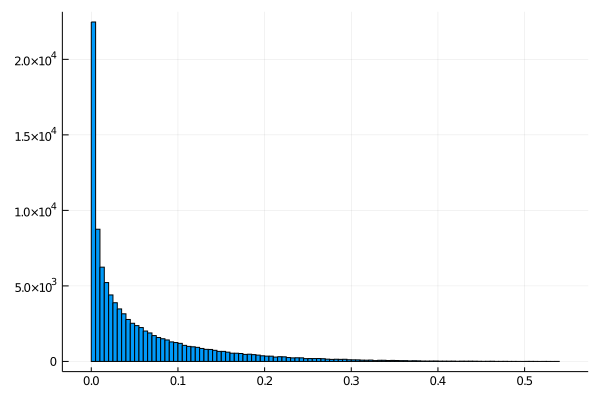

In [80]:
histogram(arr1,legend=false)

In [ ]:
using Pkg
Pkg.add("Plots") #this would install Plots.jl

In [68]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


### Matrices

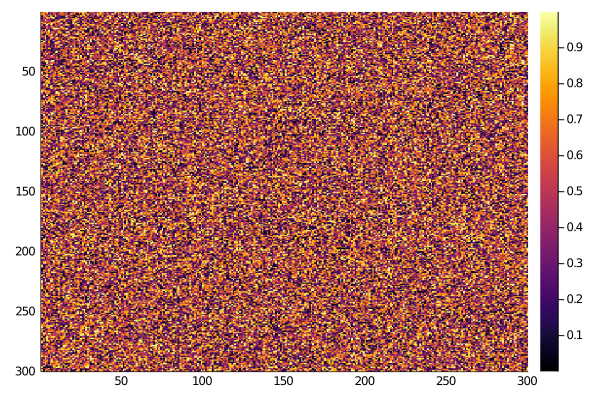

In [71]:
using Plots
heatmap(rand(300,300),yflip = true)

In [26]:
H = [i == j+4 || i == j-2 for i in 1:10, j in 1:10]

10×10 Array{Bool,2}:
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 1  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  1  0
 0  0  0  1  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

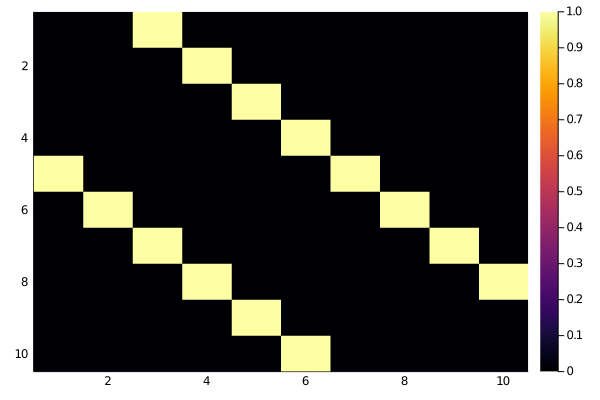

In [27]:
heatmap(H,yflip = true)

In [83]:
A = [1 2; 3 4] #2 by 2 matrix
B = [-2 3; 1 3]
C = [0 1 2; 
    -1 1 0]; # 2 by 3 matrix
display(A)
display(B)
display(C)


2×2 Array{Int64,2}:
 1  2
 3  4

2×2 Array{Int64,2}:
 -2  3
  1  3

2×3 Array{Int64,2}:
  0  1  2
 -1  1  0

In [85]:
A+C

DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), b has dims (Base.OneTo(2), Base.OneTo(3)), mismatch at 2")

In [84]:
A+B

2×2 Array{Int64,2}:
 -1  5
  4  7

In [87]:
3A

2×2 Array{Int64,2}:
 3   6
 9  12

In [31]:
2A+B

2×2 Array{Int64,2}:
 0   7
 7  11

In [32]:
A+C

DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), b has dims (Base.OneTo(2), Base.OneTo(3)), mismatch at 2")

### Matrix Multiplication

Four ways: 

* Dot product
* Cols
* Rows
* Outer product

In [88]:
display(A)
display(B)

2×2 Array{Int64,2}:
 1  2
 3  4

2×2 Array{Int64,2}:
 -2  3
  1  3

In [90]:
A[1,1]*B[1,2]+A[1,2]*B[2,2]

9

To get to the 9 value in entry 1,2 of the product A,B, I take the inner product of the first row of A and second collumn of B

In [91]:
A*B

2×2 Array{Int64,2}:
  0   9
 -2  21

In [92]:
B*A

2×2 Array{Int64,2}:
  7   8
 10  14

**Matrix multiplication is (generally) not commutative**

In [93]:
f(x) = x^2 #one line function

f (generic function with 1 method)

In [94]:
f(-4)

16

In [110]:
#doc string
""" 
My own matrix multiplication function \$A \\times B\$
"""
function myMatMult(A,B)
    n,m = size(A)
    p,q = size(B)
    if m != p #check number of col's of A = number of rows of b
        @error "Size mismatch"
    end
    C = zeros(n,q)
    for i in 1:n
        for j in 1:q
            C[i,j] = dot(A[i,:],B[:,j]) #dot product of i'th row of A and j'th col of B
        end
    end
    C
end

myMatMult

In [96]:
[1 2 3] #1 by 3 matrix (also happens to be a row vector)

1×3 Array{Int64,2}:
 1  2  3

In [97]:
[1;2] #2 by 1 matrix (also happens to be a col vector)

2-element Array{Int64,1}:
 1
 2

In [101]:
size([1 2 3]),size([1;2])

((1, 3), (2,))

In [103]:
[1 ; 2]

2-element Array{Int64,1}:
 1
 2

In [104]:
myMatMult([1 2 3],[1 0; 2 -3]) #attempt to multiply a 3x1 matrix by a 2x2 matrix

┌ Error: Size mismatch
└ @ Main In[99]:9


DimensionMismatch: DimensionMismatch("first array has length 3 which does not match the length of the second, 2.")

In [111]:
? myMatMult

search: myMatMult



My own matrix multiplication function $A \times B$


In [38]:
myMatMult(A,B)

2×2 Array{Float64,2}:
  0.0   9.0
 -2.0  21.0

LAPACK (matrix routines)

In [112]:
using Random
Random.seed!(0)
A = rand(100,100)
@time begin
    for _ in 1:1000
        global A = A*rand(100,100)
    end
end

  2.259014 seconds (2.55 M allocations: 272.267 MiB, 6.42% gc time)


In [114]:
Random.seed!(0)
A = rand(100,100)
@time begin
    for _ in 1:1000
        global A = myMatMult(A,rand(100,100))
    end
end

 15.110912 seconds (20.00 M allocations: 16.838 GiB, 42.49% gc time)


In [123]:
[1,2]*[10,100]' #outer product

2×2 Array{Int64,2}:
 10  100
 20  200

In [124]:
#doc string
""" 
Another way to implement (view) the matrix multiplication
"""
function outerProdMatrixProd(A,B)
    n,m = size(A)
    p,q = size(B)
    if m != p #check number of col's of A = number of rows of b
        @error "Size mismatch"
    end
    C = zeros(n,q)
    for k in 1:m
        #A[:,k] #k'th col of A
        #B[k,:] #k'th row of B
        #@show A[:,k]
        C += A[:,k]*B[k,:]' #outer product (don't forget the ')
    end
    C
end

outerProdMatrixProd

In [117]:
A = rand([7,12,33],5,3)

5×3 Array{Int64,2}:
  7   7  33
 33  33  33
 12  33   7
  7  12  12
 12   7  33

In [118]:
B = rand([-1,0,24,23,522,4],3,10)

3×10 Array{Int64,2}:
  -1    4  23   0  -1  522  522  23    0  24
 522  522  24  23   0    4   -1   0   24  23
  -1   23  24  23  23   23   23  24  522  23

In [119]:
A*B

5×10 Array{Int64,2}:
  3614   4441  1121   920  752   4441   4406   953  17394  1088
 17160  18117  2343  1518  726  18117  17952  1551  18018  2310
 17207  17435  1236   920  149   6557   6392   444   4446  1208
  6245   6568   737   552  269   3978   3918   449   6552   720
  3609   4461  1236   920  747   7051   7016  1068  17394  1208

In [125]:
outerProdMatrixProd(A,B)

5×10 Array{Float64,2}:
  3614.0   4441.0  1121.0   920.0  752.0  …   4406.0   953.0  17394.0  1088.0
 17160.0  18117.0  2343.0  1518.0  726.0     17952.0  1551.0  18018.0  2310.0
 17207.0  17435.0  1236.0   920.0  149.0      6392.0   444.0   4446.0  1208.0
  6245.0   6568.0   737.0   552.0  269.0      3918.0   449.0   6552.0   720.0
  3609.0   4461.0  1236.0   920.0  747.0      7016.0  1068.0  17394.0  1208.0

In [127]:
norm(outerProdMatrixProd(A,B) - A*B) #check these are the same...

0.0

### Identity Matrix

In [47]:
I

UniformScaling{Bool}
true*I

In [51]:
A = [1 2; 3 4] 

2×2 Array{Int64,2}:
 1  2
 3  4

In [52]:
A*I .== A

2×2 BitArray{2}:
 1  1
 1  1

In [53]:
I*A

2×2 Array{Int64,2}:
 1  2
 3  4

### Inverses

$$A^{-1} A = I, 
\qquad
A A^{-1} = I$$

In [54]:
Ai = inv(A)

2×2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [55]:
Ai*A

2×2 Array{Float64,2}:
 1.0          0.0
 2.22045e-16  1.0

In [56]:
A*Ai

2×2 Array{Float64,2}:
 1.0          0.0
 8.88178e-16  1.0

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

In [57]:
A = [1 2; 3 4];
B = [5 6; 7 8]
inv(A*B)

2×2 Array{Float64,2}:
  12.5   -5.5
 -10.75   4.75

In [58]:
inv(B)*inv(A)

2×2 Array{Float64,2}:
  12.5   -5.5
 -10.75   4.75

### Transpose

In [67]:
A = [j+3(i-1) for i in 1:3, j in 1:3]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [68]:
A'

3×3 Adjoint{Int64,Array{Int64,2}}:
 1  4  7
 2  5  8
 3  6  9

A symmetric matrix has $A^T = A$

In [69]:
issymmetric(A)

false

In [73]:
S = (A'+A)/2
display(S)
issymmetric(S)

3×3 Array{Float64,2}:
 1.0  3.0  5.0
 3.0  5.0  7.0
 5.0  7.0  9.0

true

$$(A B)^T = B^T A^T$$

In [75]:
B = A .+ 3

3×3 Array{Int64,2}:
  4   5   6
  7   8   9
 10  11  12

In [78]:
display((A*B)')
display(B'*A')

3×3 Adjoint{Int64,Array{Int64,2}}:
 48  111  174
 54  126  198
 60  141  222

3×3 Array{Int64,2}:
 48  111  174
 54  126  198
 60  141  222

### Determinants

In [59]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [60]:
using LinearAlgebra
det(A), A[1,1]*A[2,2]-A[1,2]*A[2,1]

(-2.0, -2)

In [61]:
B = [ 1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [62]:
det(B)

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (2, 3)")

In [63]:
function myDet(A)
    n, m = size(A)
    n == m || @error "Dimension mismatch"
    if n == 2
        return A[1,1]*A[2,2]-A[1,2]*A[2,1]
    else
        return sum([(-1)^(i+1)*A[1,i]*det(A[2:n,setdiff(1:n,i)])   for i in 1:n])
    end
end

myDet (generic function with 1 method)

In [42]:
A = rand(5,5)

5×5 Array{Float64,2}:
 0.411547  0.856212  0.77529    0.00774377  0.9056
 0.487703  0.361782  0.208092   0.940379    0.456911
 0.262204  0.490879  0.0390169  0.420601    0.626411
 0.207319  0.131707  0.286204   0.456596    0.155493
 0.824443  0.638328  0.290695   0.832459    0.168462

In [43]:
det(A)

-0.011605359687676266

In [44]:
myDet(A)

-0.011605359687676262

In [45]:
det(inv(A)),1/det(A)

(-86.16708373648252, -86.16708373648257)

$$|AB| =|A| |B|$$

In [55]:
A = [1 0;
    1 0]

2×2 Array{Int64,2}:
 1  0
 1  0

In [56]:
det(A)

0.0

In [57]:
inv(A)

LAPACKException: LAPACKException(2)

In [65]:
B = [1 2 3;
     4 5 6;
     5 7 9]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 5  7  9

In [66]:
det(B)

2.664535259100378e-15

In [67]:
inv(B)

3×3 Array{Float64,2}:
  1.1259e15   1.1259e15  -1.1259e15
 -2.2518e15  -2.2518e15   2.2518e15
  1.1259e15   1.1259e15  -1.1259e15

In [70]:
cond(B)

1.3295683760909222e16

In [69]:
? cond

search: cond condskeel Condition macroexpand @macroexpand @macroexpand1



```
cond(M, p::Real=2)
```

Condition number of the matrix `M`, computed using the operator `p`-norm. Valid values for `p` are `1`, `2` (default), or `Inf`.


# Application: k-means

Taken from Listings 9.12 and 9.13 of [SWJ]:

In [82]:
using Pkg
Pkg.add("Clustering")

   Updating registry at `~/.juliapro/JuliaPro_v1.4.2-1/registries/JuliaPro`
######################################################################### 100.0%
  Resolving package versions...
  Installed Distances ──────── v0.9.0
  Installed DataStructures ─── v0.17.19
  Installed NearestNeighbors ─ v0.4.6
   Updating `~/Project.toml`
  [aaaa29a8] + Clustering v0.14.1
   Updating `~/Manifest.toml`
  [aaaa29a8] + Clustering v0.14.1
  [9a962f9c] + DataAPI v1.3.0
  [864edb3b] + DataStructures v0.17.19
  [b4f34e82] + Distances v0.9.0
  [e1d29d7a] + Missings v0.4.3
  [b8a86587] + NearestNeighbors v0.4.6
  [bac558e1] + OrderedCollections v1.3.0
  [a2af1166] + SortingAlgorithms v0.3.1
  [90137ffa] + StaticArrays v0.12.4
  [2913bbd2] + StatsBase v0.33.0


┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1260


Number of clusters: 3
Counts of clusters: [899, 1149, 952]


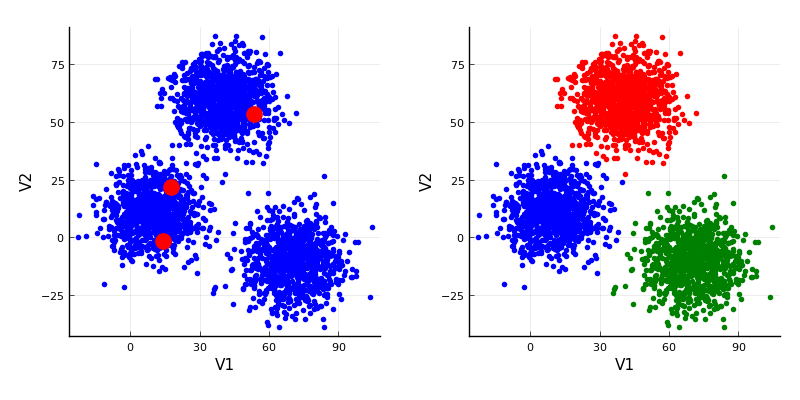

In [83]:
using Clustering, RDatasets, Random, Measures, Plots; pyplot()
Random.seed!(0)

K = 3
df = dataset("cluster", "xclara")
data = copy(convert(Array{Float64}, df)')

seeds = initseeds(:rand, data, K)
xclaraKmeans = kmeans(data, K, init = seeds)

println("Number of clusters: ", nclusters(xclaraKmeans))
println("Counts of clusters: ", counts(xclaraKmeans))

df.Group  = assignments(xclaraKmeans)

p1 = scatter(df[:, :V1], df[:, :V2], c=:blue, msw=0)
     scatter!(df[seeds, :V1], df[seeds, :V2], markersize=12, c=:red, msw=0)

p2 = scatter( df[df.Group .== 1, :V1], df[df.Group .== 1, :V2], c=:blue, msw=0)
     scatter!( df[df.Group .== 2, :V1], df[df.Group .== 2, :V2], c=:red, msw=0)
     scatter!( df[df.Group .== 3, :V1], df[df.Group .== 3, :V2], c=:green, msw=0)

plot(p1,p2,legend=:none,ratio=:equal,
    size=(800,400), xlabel="V1", ylabel="V2", margin = 5mm)

In [84]:
using RDatasets, Distributions, Random, LinearAlgebra
Random.seed!(0)

K = 3
df = dataset("cluster", "xclara")
n,_ = size(df)
dataPoints = [convert(Array{Float64,1},df[i,:]) for i in 1:n]
shuffle!(dataPoints)

xMin,xMax = minimum(first.(dataPoints)),maximum(first.(dataPoints))
yMin,yMax = minimum(last.(dataPoints)),maximum(last.(dataPoints))

means = [[rand(Uniform(xMin,xMax)),rand(Uniform(yMin,yMax))]  for _ in 1:K]
labels = rand(1:K,n)
prevMeans = -means

while norm(prevMeans - means) > 0.001
    prevMeans = means
    labels = [argmin([norm(means[i]-x) for i in 1:K]) for x in dataPoints]
    means = [sum(dataPoints[labels .== i])/sum(labels .==i) for i in 1:K]
end

cnts = [sum(labels .== i) for i in 1:K]
println("Counts of clusters (manual implementation): ", cnts)

Counts of clusters (manual implementation): [899, 1149, 952]
